In [ ]:
!pip install seaborn
!pip install matplotlib

In [29]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from time import sleep
from selenium import webdriver  
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.support.ui import Select  
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException 
import re
import sys
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
#vamos a abrir todos los Archivos para compararlos y los vamos a convertir en dataframes

df_actividades_asturias = pd.read_csv('../Datos/Actividades_Asturias.csv')
df_actividades_malaga = pd.read_csv('../Datos/Actividades_malaga.csv')
df_vuelos_asturias = pd.read_csv('../Datos/vuelos_Asturias.csv')
df_vuelos_malaga = pd.read_csv('../Datos/vuelos_malaga.csv')
df_motos_malaga = pd.read_csv('../Datos/vehiculos_malaga.csv')
df_hoteles_asturias = pd.read_csv('../Datos/tripadvaisor_Asturias.csv')
df_hoteles_malaga = pd.read_csv('../Datos/tripadvaisor_malaga.csv')

Vamos a sacar informacion relativa sobre los hoteles comprandolos

In [46]:
df_concat_hoteles = pd.concat([df_hoteles_asturias, df_hoteles_malaga], axis=0)
df_concat_hoteles.head(2)

,Unnamed: 0,Nombre Hotel,Talla,Puntuacion media,Detalles extra,Precio,Proveedor,URL,Ciudad
0,0,HOTEL VALLE LAS LUIÑAS,Nan,4.5,Nan,88.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias
1,1,1. Barceló Oviedo Cervantes,SMALL,4.5,Nan,151.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias


In [ ]:
df_concat_hoteles.drop(columns=['Unnamed: 0','Unnamed: 0.1','URL'])


In [50]:
puntuaciones = df_concat_hoteles.groupby('Ciudad')['Puntuacion media'].mean().reset_index()
diferencia = puntuaciones['Puntuacion media'].max() - puntuaciones['Puntuacion media'].min()

C:\Users\HP\AppData\Local\Temp\ipykernel_14820\2357811341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=puntuaciones, x='Ciudad', y='Puntuacion media', palette='magma',ax=axs[0, 0])


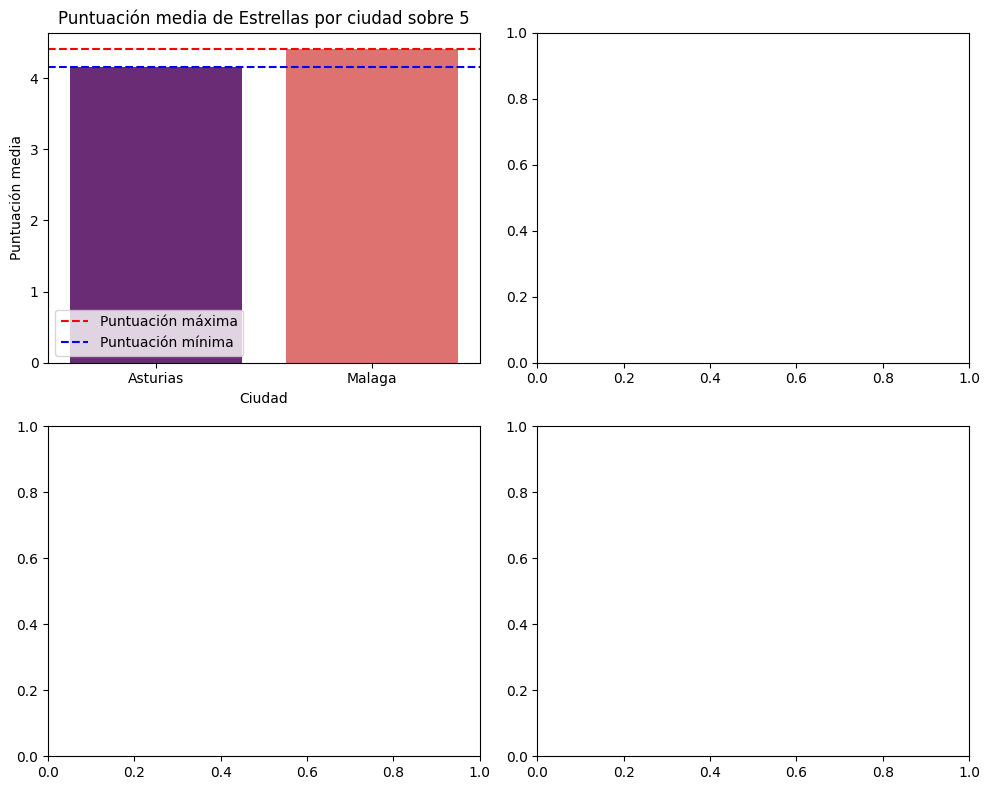

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=puntuaciones, x='Ciudad', y='Puntuacion media', palette='magma',ax=axs[0, 0])

axs[0, 0].axhline(y=puntuaciones['Puntuacion media'].max(), color='r', linestyle='--', label='Puntuación máxima')
axs[0, 0].axhline(y=puntuaciones['Puntuacion media'].min(), color='b', linestyle='--', label='Puntuación mínima')
axs[0, 0].set_title('Puntuación media de Estrellas por ciudad sobre 5')
axs[0, 0].set_ylabel('Puntuación media')
axs[0, 0].set_xlabel('Ciudad')
axs[0, 0].legend()

plt.tight_layout()
plt.show()
